In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data = pd.read_csv('housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
# cleaned data
print(data['total_bedrooms'].hasnans)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())
data.dropna(inplace=True)
print(data['total_bedrooms'].hasnans)

True
False


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
# median house value is the target value 
# the rest are training features/set
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis=1)
y =data['median_house_value']

In [26]:
train_data = X.join(y)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

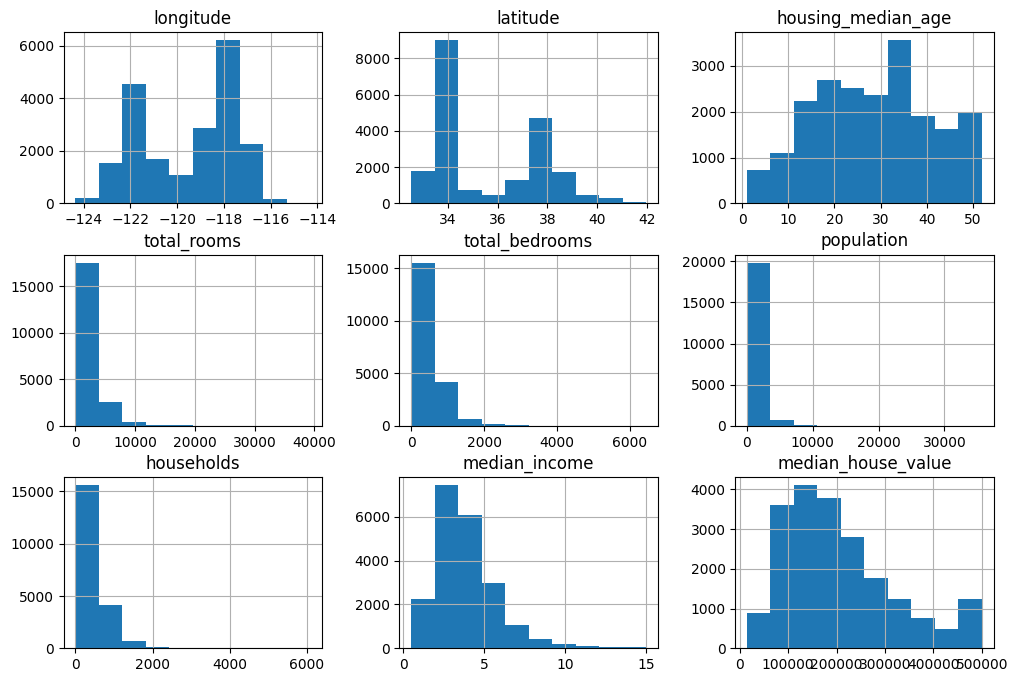

In [27]:
# data visualizatoin
train_data.hist(figsize=(12,8))

<Axes: >

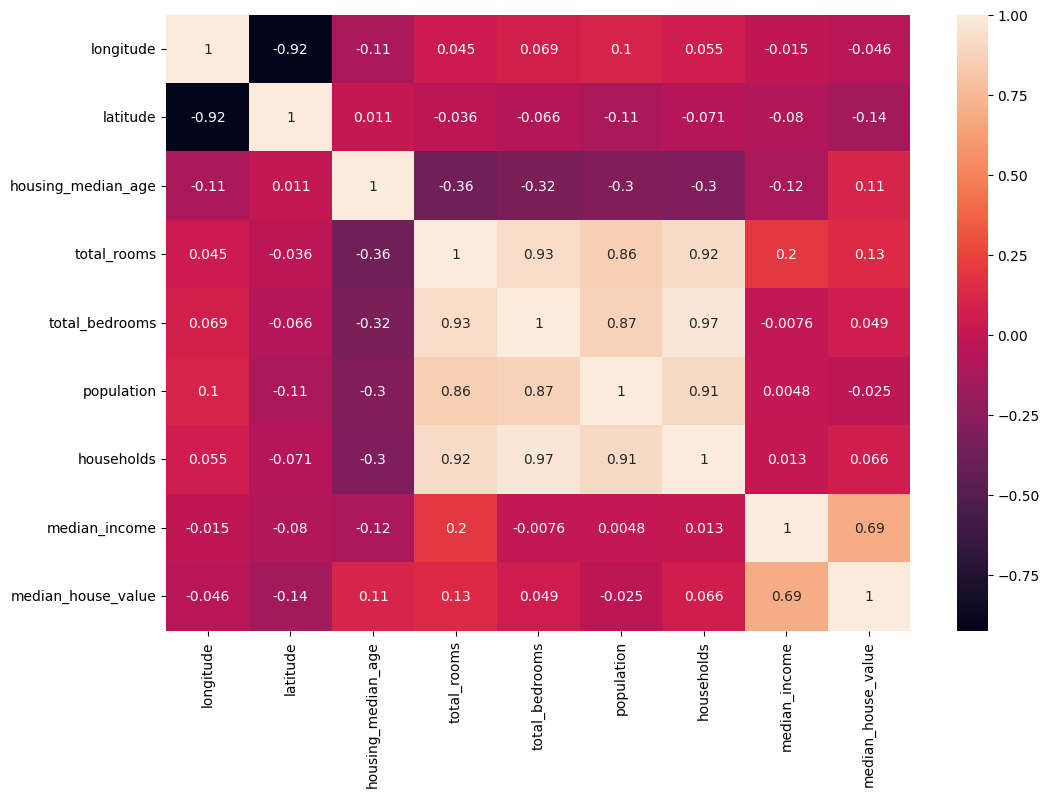

In [28]:
# more data visualization using seabonr
plt.figure(figsize=(12,8))
sns.heatmap(train_data.loc[:,train_data.columns != "ocean_proximity"].corr(),annot=True)

In [29]:
# adjustings the histograms to try to achieve more of a bell curve to find a correlation
# and to see if feature engineering is necessary
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

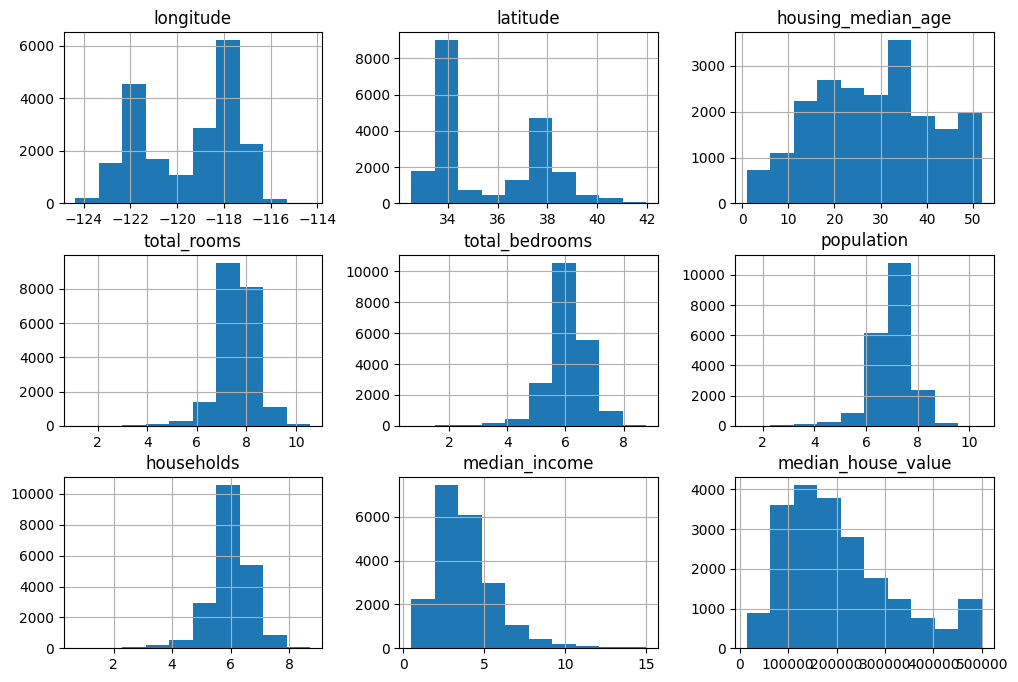

In [30]:
# after adjusting data skewed
# bell curved is achieved in four features
train_data.hist(figsize=(12,8))

<Axes: >

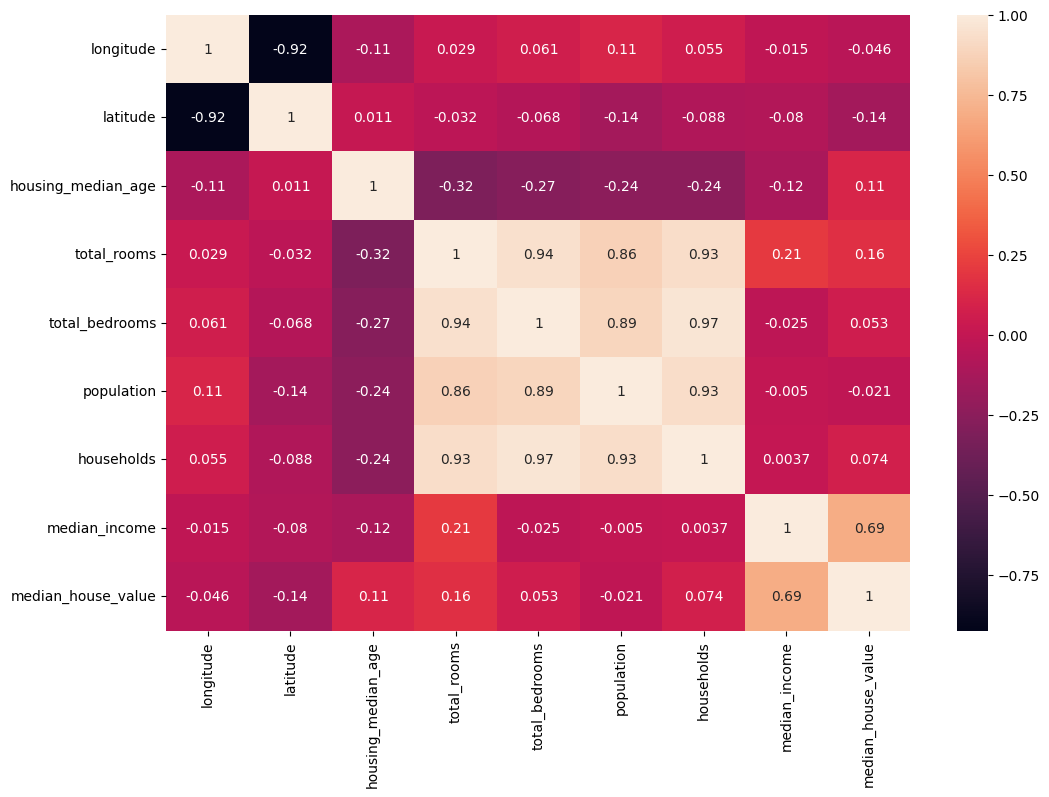

In [31]:
# heatmap visualization after adjusting data
plt.figure(figsize=(12,8))
sns.heatmap(train_data.loc[:,train_data.columns != "ocean_proximity"].corr(),annot=True)

In [32]:
# getting value counts to object data
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [33]:
#getting binary values for object data to normalize later
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [34]:
# joining converted data to the dataset to visulize
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


<Axes: >

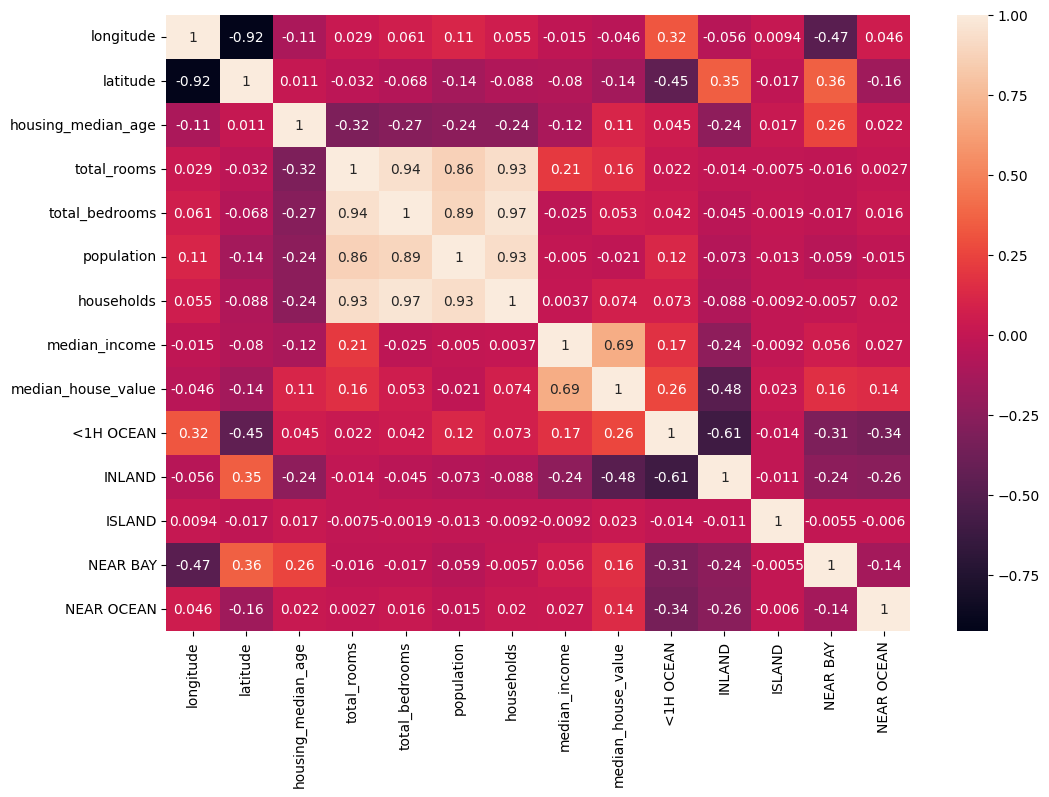

In [35]:
# data visualized to heapmap
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

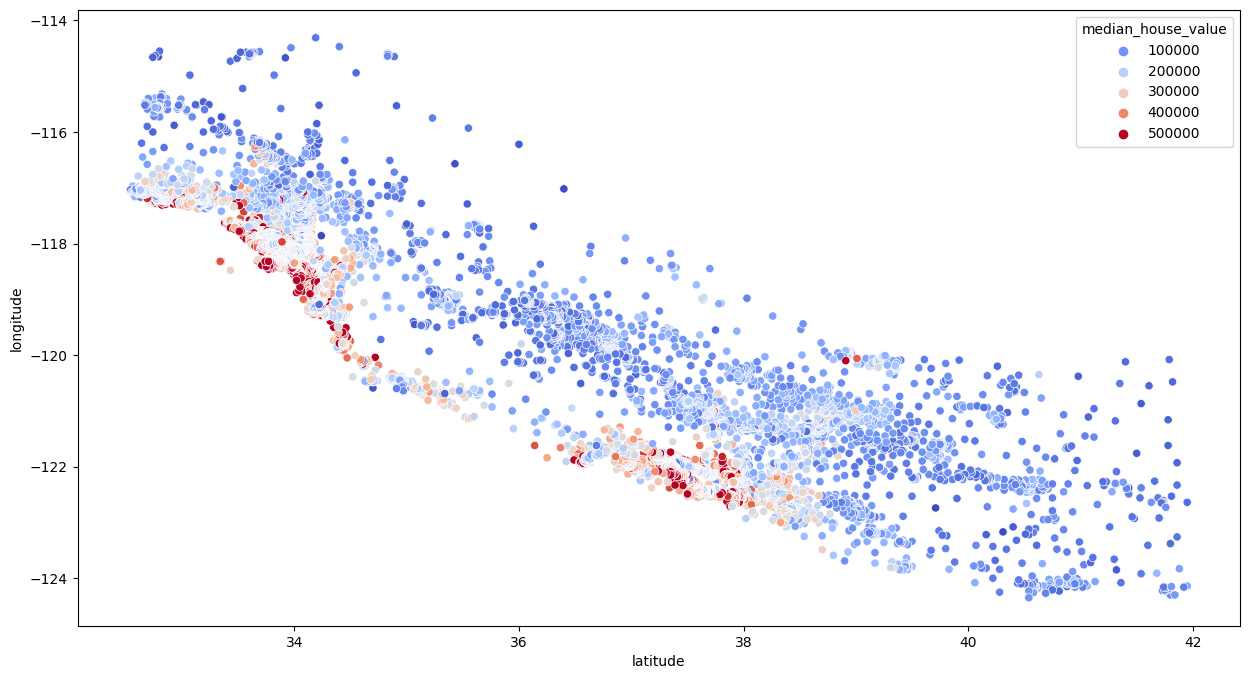

In [36]:
# scatter plot to highlight what data seems to be 
# more affected by location to find further visualization 
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

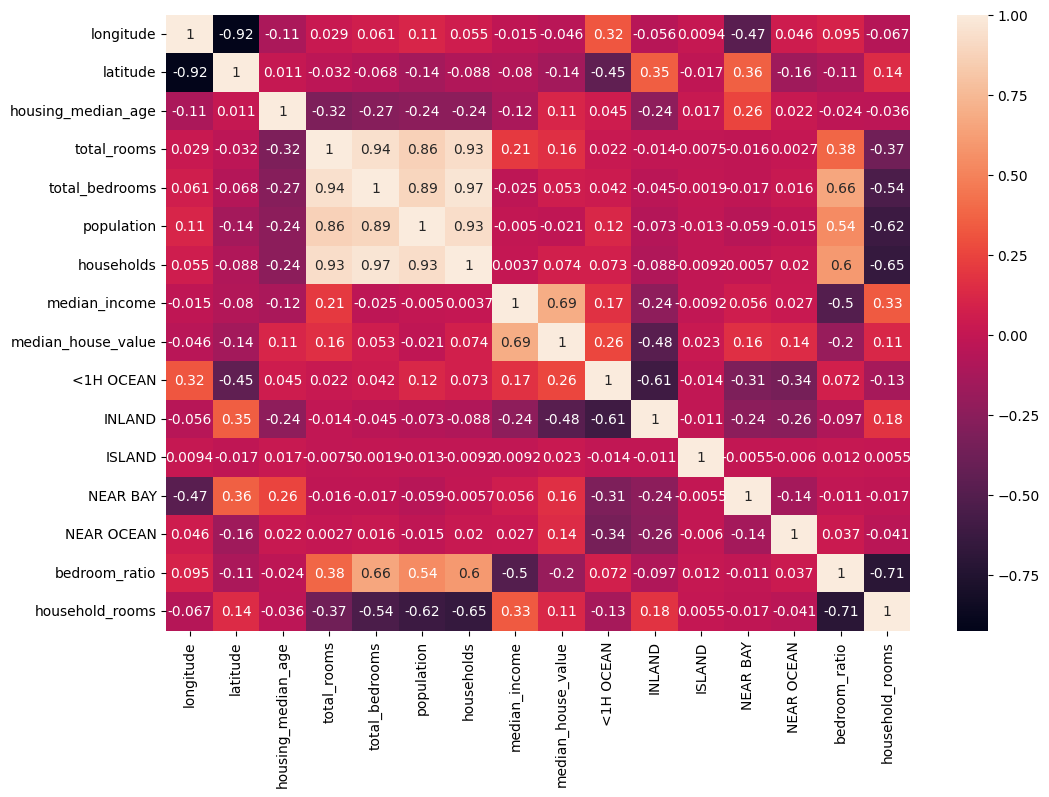

In [37]:

# engineering more features to look at the ratios for bedrooms to total rooms and 
# total rooms to households to see how they correlate to each other
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] =train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)

In [38]:
# linear regression testing 
# Note: not the best type of regressison for this data set
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(train_data.drop(['median_house_value'],axis=1),train_data['median_house_value'], test_size=.2)
scalar= StandardScaler()
x_train_s=scalar.fit_transform(X_train)
reg = LinearRegression()
reg.fit(x_train_s,y_train)


LinearRegression()

In [39]:
#scaled the test and training data for a more accurate representation
# of test results
x_test_s = scalar.fit_transform(X_test)

In [40]:
# test results for linear regression 
print("train: ",reg.score(x_train_s,y_train))
test_score = reg.score(x_test_s,y_test)
while test_score < 0:
    test_score = reg.score(x_test_s,y_test)
print("test: ",test_score)




train:  0.6650987795691652
test:  0.6799367617144431


In [41]:
# random forest regressor to examine
# differences between linear and random forest regression
from sklearn.ensemble import RandomForestRegressor

scaler =StandardScaler()
X_test_s = scaler.fit_transform(X_test)
X_train_s =scaler.fit_transform(X_train)
forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [42]:
# large difference between linear regression and random forest
# without optimizations

print("train: ", forest.score(X_train_s,y_train))
print("test: ",forest.score(X_test_s,y_test))

train:  0.9737409497531031
test:  0.8098033418753876


In [43]:
# using GridSearchCV to find optimization hyperparameters
# used documentation from  RandomForestRegressor to choose the best
# hypterparameters to use for param_grid and used the negative mean squared error alg to return
# the best estimators
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [400,500,600],
    "max_features": [8,10,20],
    "n_jobs":[2,4,6,8]
}
g_search = GridSearchCV(forest,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error", return_train_score=True)
g_search.fit(X_train_s,y_train)

In [ ]:
# shows the returned optimizations hyperparameters to be used when scoring
g_search.best_estimator_

In [ ]:
best_forest = g_search.best_estimator_

In [ ]:
# printing scores
print("train: ", best_forest.score(X_train_s,y_train))
print("test: ",best_forest.score(X_test_s,y_test))